In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt

2024-05-16 08:32:05.615519: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-16 08:32:05.615647: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-16 08:32:05.740905: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
# Data Augmentation and Preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,                # Normalize pixel values to [0, 1]
    rotation_range=20,             # Randomly rotate images by up to 20 degrees
    width_shift_range=0.2,         # Randomly shift images horizontally by up to 20% of the width
    height_shift_range=0.2,        # Randomly shift images vertically by up to 20% of the height
    shear_range=0.2,               # Apply random shearing transformations
    zoom_range=0.2,                # Apply random zooming
    horizontal_flip=True,          # Randomly flip images horizontally
    fill_mode='nearest',           # Fill in new pixels with the nearest pixel values
    validation_split=0.2           # Use 20% of training data for validation
)

test_datagen = ImageDataGenerator(rescale=1./255)

In [3]:
# Load Data
train_dir = '../input/chest-xray-pneumonia/chest_xray/chest_xray/train'
test_dir =  '../input/chest-xray-pneumonia/chest_xray/chest_xray/test'



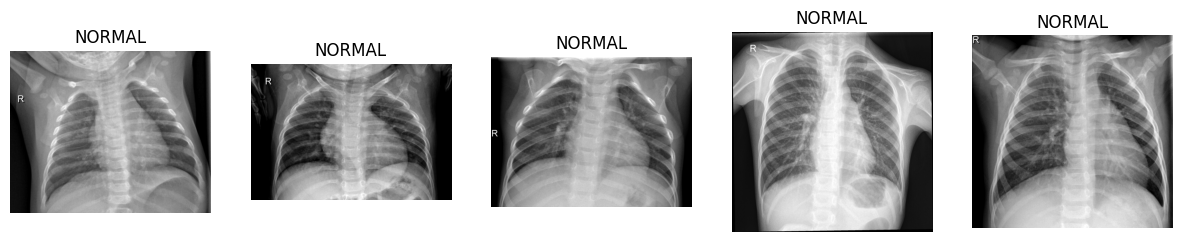

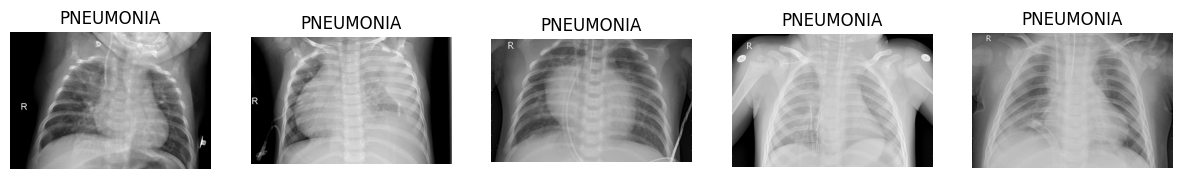

In [4]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import os
import random

def display_sample_images(directory, class_name):
    class_dir = os.path.join(directory, class_name)
    sample_images = random.sample(os.listdir(class_dir), 5)
    plt.figure(figsize=(15, 5))
    for i, img_name in enumerate(sample_images):
        img_path = os.path.join(class_dir, img_name)
        img = mpimg.imread(img_path)
        plt.subplot(1, 5, i+1)
        plt.imshow(img, cmap='gray')
        plt.title(class_name)
        plt.axis('off')
    plt.show()

display_sample_images(train_dir, 'NORMAL')
display_sample_images(train_dir, 'PNEUMONIA')

In [5]:

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),        # Resize all images to 224x224 pixels
    batch_size=32,                 # Number of images to yield in one batch
    class_mode='binary',           # Binary classification (NORMAL or PNEUMONIA)
    subset='training'              # Set as training data
)

validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='validation'  # Set as validation data
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)


Found 4173 images belonging to 2 classes.
Found 1043 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [6]:
# Model Architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),  # Convolutional layer with 32 filters and a 3x3 kernel
    MaxPooling2D((2, 2)),                                              # Max-pooling layer with 2x2 pool size
    Conv2D(64, (3, 3), activation='relu'),                             # Convolutional layer with 64 filters and a 3x3 kernel
    MaxPooling2D((2, 2)),                                              # Max-pooling layer with 2x2 pool size
    Conv2D(128, (3, 3), activation='relu'),                            # Convolutional layer with 128 filters and a 3x3 kernel
    MaxPooling2D((2, 2)),                                              # Max-pooling layer with 2x2 pool size
    Flatten(),                                                         # Flatten the 3D output to 1D tensor
    Dense(512, activation='relu'),                                     # Fully connected layer with 512 units
    Dropout(0.5),                                                      # Dropout layer to prevent overfitting
    Dense(1, activation='sigmoid')                                     # Output layer with a single neuron for binary classification
])

# Compile Model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [7]:
# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.keras', save_best_only=True, monitor='val_loss')

# Train Model
history = model.fit(
    train_generator,
    epochs=20,
    validation_data=validation_generator,
    callbacks=[early_stopping, model_checkpoint]
)


Epoch 1/20


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
2024-05-16 08:32:37.836880: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 49284: 7.84353, expected 6.92193
2024-05-16 08:32:37.836946: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 49286: 7.76792, expected 6.84632
2024-05-16 08:32:37.836956: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 49287: 6.15631, expected 5.23472
2024-05-16 08:32:37.836964: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 49288: 6.71859, expected 5.797
2024-05-16 08:32:37.836973: E external/local_xla/xla/service/gpu/buffer_co

  1/131 ━━━━━━━━━━━━━━━━━━━━ 39:30 18s/step - accuracy: 0.4688 - loss: 0.6963

I0000 00:00:1715848364.668177      92 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


114/131 ━━━━━━━━━━━━━━━━━━━━ 15s 922ms/step - accuracy: 0.7165 - loss: 1.1334

2024-05-16 08:34:30.881771: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 6: 6.85897, expected 6.06893
2024-05-16 08:34:30.881843: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 7: 5.96167, expected 5.17163
2024-05-16 08:34:30.881863: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 9: 6.44264, expected 5.65259
2024-05-16 08:34:30.881876: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 10: 6.23199, expected 5.44195
2024-05-16 08:34:30.881887: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 11: 5.01164, expected 4.22159
2024-05-16 08:34:30.881898: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 12: 5.90012, expected 5.11007
2024-05-16 08:34:30.881910: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 13: 6.65641, expected 5.86637
2024-05-16 08:34:30.881921: E external/local_xla/xl

130/131 ━━━━━━━━━━━━━━━━━━━━ 0s 907ms/step - accuracy: 0.7235 - loss: 1.1576

2024-05-16 08:35:09.504636: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 147863: 4.72744, expected 4.0417
2024-05-16 08:35:09.504697: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 147880: 5.73293, expected 5.0472
2024-05-16 08:35:09.504707: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 147890: 5.71297, expected 5.02723
2024-05-16 08:35:09.504715: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 147914: 5.62853, expected 4.94279
2024-05-16 08:35:09.504722: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 147917: 5.73317, expected 5.04744
2024-05-16 08:35:09.504730: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 147918: 5.66365, expected 4.97791
2024-05-16 08:35:09.504738: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 147919: 5.64485, expected 4.95912
2024-05-16 08:35:09.50

131/131 ━━━━━━━━━━━━━━━━━━━━ 167s 1s/step - accuracy: 0.7242 - loss: 1.1595 - val_accuracy: 0.7872 - val_loss: 9.9203
Epoch 2/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 146s 796ms/step - accuracy: 0.8055 - loss: 1.1035 - val_accuracy: 0.7939 - val_loss: 6.6168
Epoch 3/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 106s 782ms/step - accuracy: 0.7701 - loss: 5.4844 - val_accuracy: 0.7967 - val_loss: 1.5870
Epoch 4/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 106s 770ms/step - accuracy: 0.8131 - loss: 0.4181 - val_accuracy: 0.7987 - val_loss: 2.6204
Epoch 5/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 106s 779ms/step - accuracy: 0.7812 - loss: 0.8209 - val_accuracy: 0.7910 - val_loss: 33.6526
Epoch 6/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 104s 757ms/step - accuracy: 0.7560 - loss: 11.2800 - val_accuracy: 0.7430 - val_loss: 21.1534
Epoch 7/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 101s 741ms/step - accuracy: 0.7374 - loss: 3.3105 - val_accuracy: 0.7306 - val_loss: 246.8568
Epoch 8/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 103s 753ms/step - accuracy: 0.7452 - loss: 7.

In [8]:
# Evaluate on Validation Data
val_loss, val_accuracy = model.evaluate(validation_generator)
print(f'Validation Accuracy: {val_accuracy * 100:.2f}%')

# Evaluate on Test Data
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')


33/33 ━━━━━━━━━━━━━━━━━━━━ 27s 802ms/step - accuracy: 0.7870 - loss: 0.5299
Validation Accuracy: 78.72%
19/20 ━━━━━━━━━━━━━━━━━━━━ 0s 406ms/step - accuracy: 0.6440 - loss: 0.7461

2024-05-16 08:48:42.796270: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 148273: 4.10347, expected 3.58648
2024-05-16 08:48:42.796367: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 149075: 3.91455, expected 3.39756
2024-05-16 08:48:42.796379: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 149093: 3.88055, expected 3.36356
2024-05-16 08:48:42.796390: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 149362: 4.10975, expected 3.59276
2024-05-16 08:48:42.796402: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 149850: 3.98709, expected 3.4701
2024-05-16 08:48:42.796449: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 151973: 3.89678, expected 3.37979
2024-05-16 08:48:42.796463: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 153061: 4.10204, expected 3.58504
2024-05-16 08:48:42.7

20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 487ms/step - accuracy: 0.6418 - loss: 0.7497
Test Accuracy: 62.02%


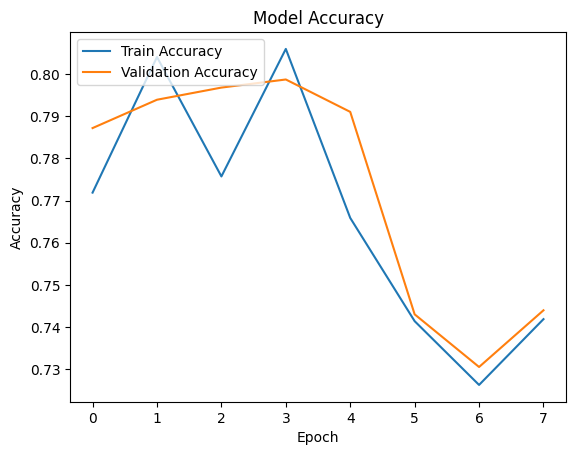

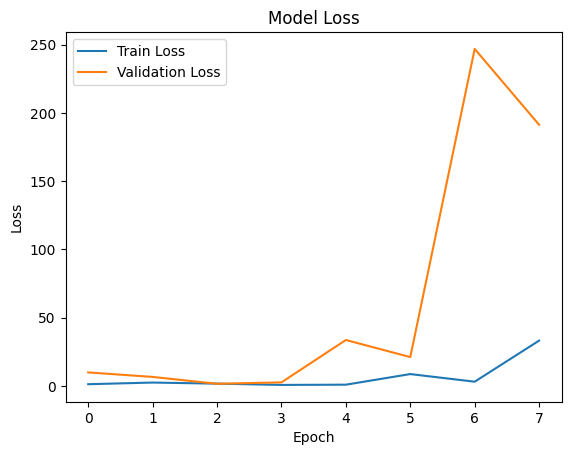

In [9]:
# Plot Training & Validation Accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')
plt.show()

# Plot Training & Validation Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper left')
plt.show()


20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 291ms/step
True label distribution: {0: 234, 1: 390}
Predicted label distribution: {0: 7, 1: 617}


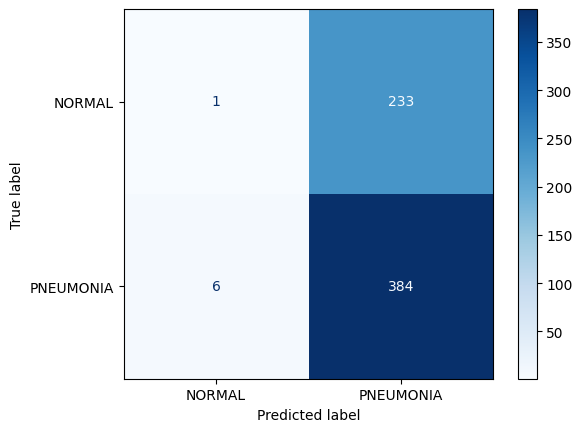

In [10]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Get true labels
test_labels = test_generator.classes

# Ensure the test generator has been run through completely
test_generator.reset()

# Get predictions
test_pred_prob = model.predict(test_generator)
test_pred_classes = (test_pred_prob > 0.5).astype("int32").flatten()

# Check distribution of true labels
unique, counts = np.unique(test_labels, return_counts=True)
print("True label distribution:", dict(zip(unique, counts)))

# Check distribution of predicted labels
unique, counts = np.unique(test_pred_classes, return_counts=True)
print("Predicted label distribution:", dict(zip(unique, counts)))

# Plot confusion matrix
cm = confusion_matrix(test_labels, test_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['NORMAL', 'PNEUMONIA'])
disp.plot(cmap=plt.cm.Blues)
plt.show()



In [11]:
# Evaluate on Training Data
train_loss, train_accuracy = model.evaluate(train_generator)
print(f'Training Accuracy: {train_accuracy * 100:.2f}%')

# Evaluate on Validation Data
val_loss, val_accuracy = model.evaluate(validation_generator)
print(f'Validation Accuracy: {val_accuracy * 100:.2f}%')



131/131 ━━━━━━━━━━━━━━━━━━━━ 84s 640ms/step - accuracy: 0.7928 - loss: 0.3964
Training Accuracy: 79.92%
33/33 ━━━━━━━━━━━━━━━━━━━━ 20s 614ms/step - accuracy: 0.7892 - loss: 0.4817
Validation Accuracy: 80.35%


In [12]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    shuffle=False  # Important to not shuffle for consistent evaluation
)

print(test_generator.class_indices)
print(f'Found {len(test_generator.filenames)} test images.')


Found 624 images belonging to 2 classes.
{'NORMAL': 0, 'PNEUMONIA': 1}
Found 624 test images.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 390ms/step


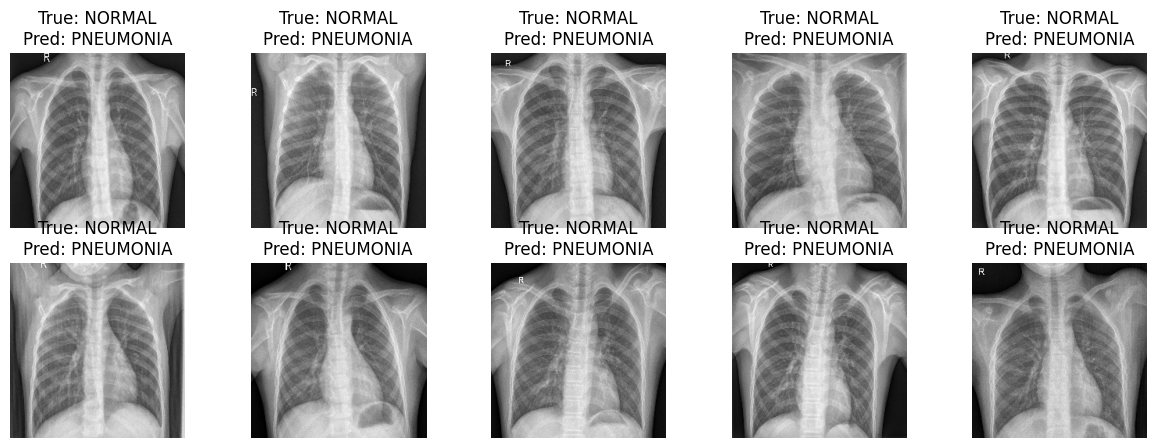

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Get a batch of test images and labels
test_generator.reset()  # Reset the generator to the beginning
x_test, y_test = next(test_generator)

# Get predictions for the batch
y_pred = (model.predict(x_test) > 0.5).astype("int32").flatten()

# Plot some of the test images along with the predicted and true labels
plt.figure(figsize=(15, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_test[i])
    true_label = 'PNEUMONIA' if y_test[i] == 1 else 'NORMAL'
    pred_label = 'PNEUMONIA' if y_pred[i] == 1 else 'NORMAL'
    plt.title(f'True: {true_label}\nPred: {pred_label}')
    plt.axis('off')
plt.show()


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 256ms/step
True label distribution: {0: 234, 1: 390}
Predicted label distribution: {0: 7, 1: 617}


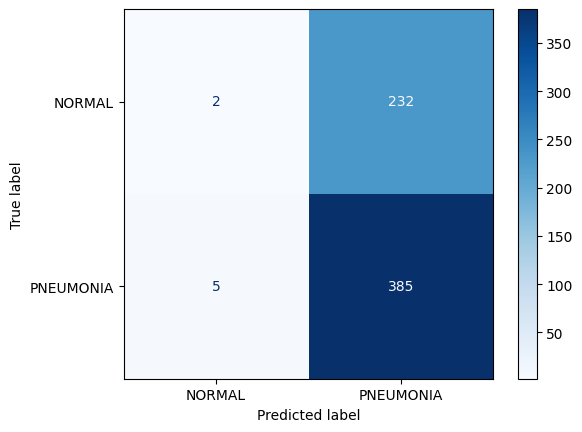

In [14]:
test_generator.reset()  # Reset the generator to the beginning
test_labels = test_generator.classes  # Get the true labels
test_pred_prob = model.predict(test_generator)  # Get the predicted probabilities
test_pred_classes = (test_pred_prob > 0.5).astype("int32").flatten()  # Convert probabilities to class labels

# Check the distribution of true and predicted labels
unique, counts = np.unique(test_labels, return_counts=True)
print("True label distribution:", dict(zip(unique, counts)))

unique, counts = np.unique(test_pred_classes, return_counts=True)
print("Predicted label distribution:", dict(zip(unique, counts)))

# Confusion Matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(test_labels, test_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['NORMAL', 'PNEUMONIA'])
disp.plot(cmap=plt.cm.Blues)
plt.show()
